In [185]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn

import nibabel as nib
import os
import time
import gc
import copy
import cv2

import albumentations as A
from albumentations.pytorch import ToTensorV2
from pytorch_toolbelt import losses as L
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import segmentation_models_pytorch as smp


In [20]:
df=pd.read_csv('output_img.csv')
df.head()

,deeplab,linknet,unet,manet,orig,mask1,mask2,mask3
0,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...
1,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...
2,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...
3,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...
4,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...,/home/bdbotond/python/deep_learning/final_proj...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


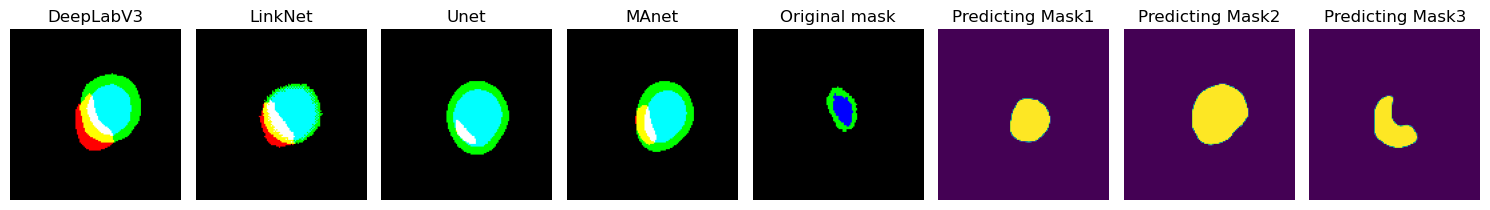

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


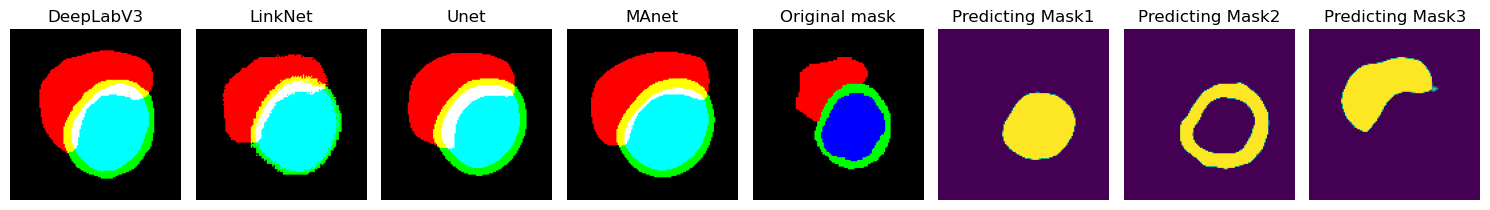

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


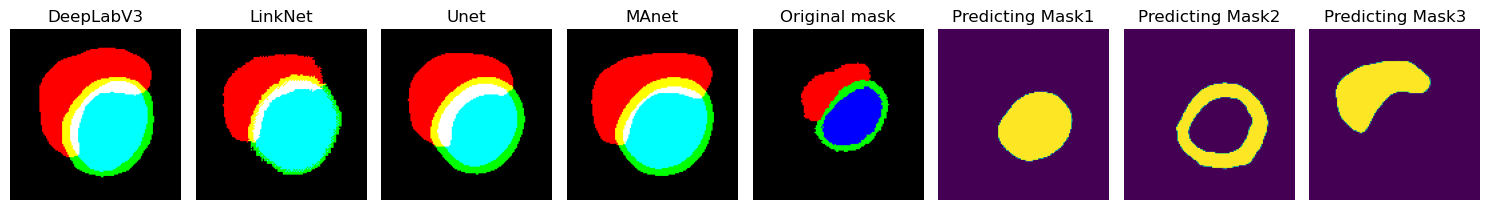

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


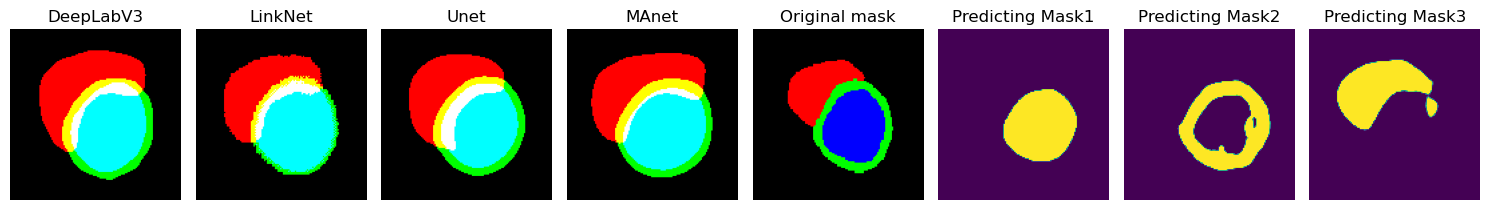

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


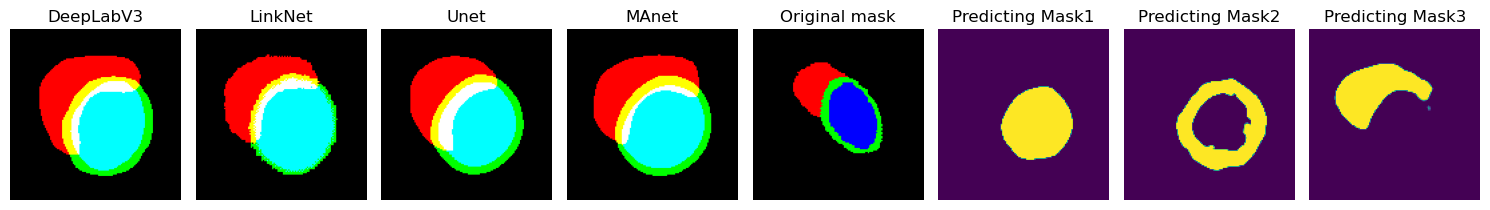

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


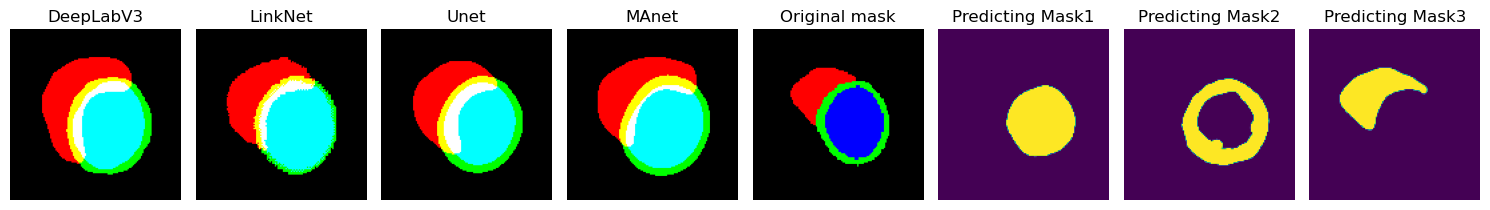

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


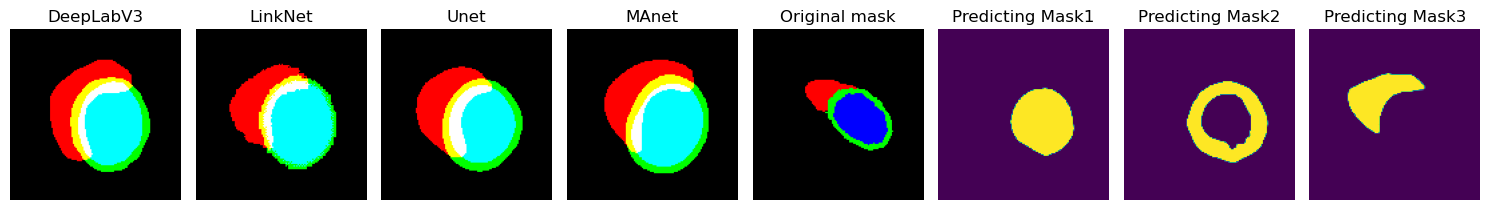

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


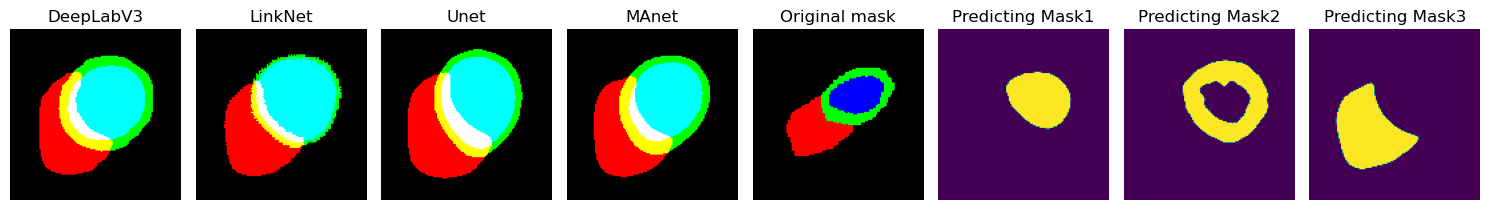

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


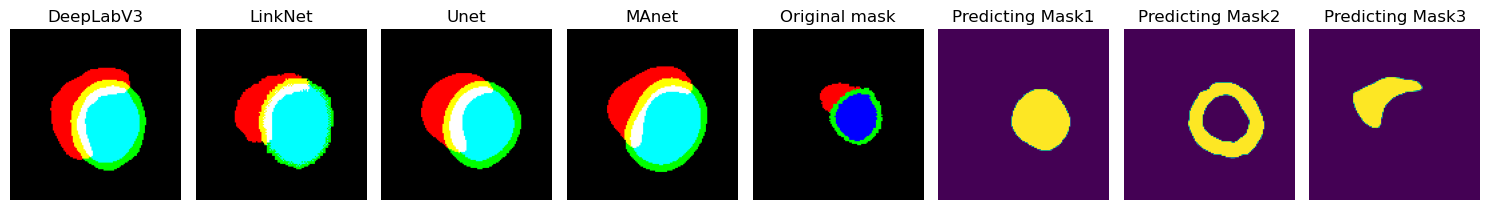

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


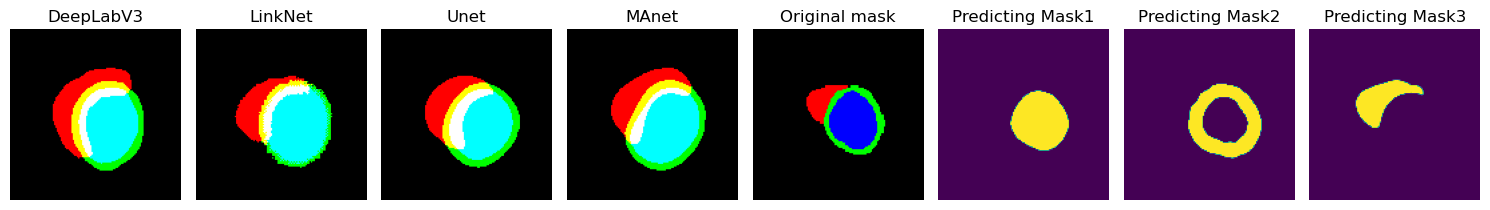

In [271]:
# Set custom column names
custom_column_names = ['DeepLabV3', 'LinkNet', 'Unet', 'MAnet', 'Original mask','Predicting Mask1','Predicting Mask2','Predicting Mask3']
df.columns = custom_column_names  # Assign new column names to the DataFrame

# Iterate through the specified rows and plot
for row_index in range(204, 214):
    row = df.iloc[row_index]
    
    # Create subplots for the row
    fig, axes = plt.subplots(1, len(row), figsize=(15, 5))  # One row of subplots
    
    for j, (col_name, path) in enumerate(row.items()):  # Iterate with column names
        img = mpimg.imread(path)  # Load image
        
        if col_name in ['DeepLabV3', 'LinkNet', 'Unet', 'MAnet']:  # Apply masking for specific columns
            axes[j].imshow(img * 255,cmap='grey')  # Scale back to 0-255
        else:
            axes[j].imshow(img,cmap='grey')  # Display original image
        
        axes[j].axis("off")  # Hide axes
        axes[j].set_title(col_name)  # Add column name as title
    
    plt.tight_layout()
    #plt.savefig('different_utputs.png', dpi=300)  # Save as PNG with high resolution

    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


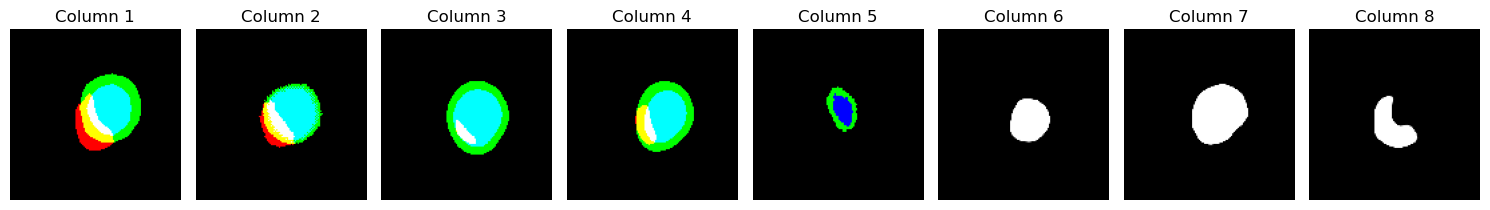

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


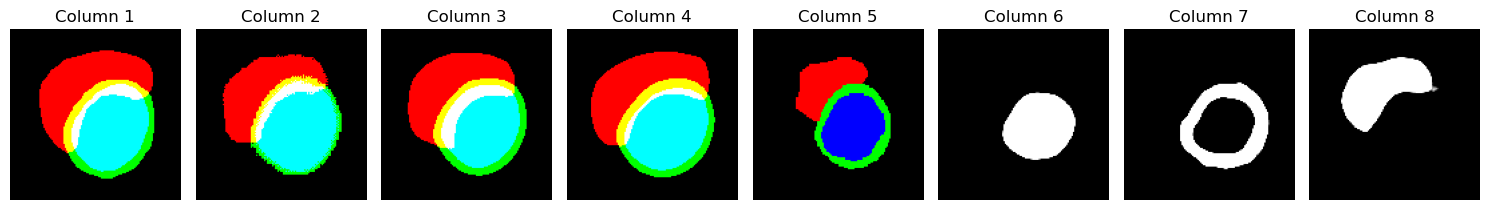

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


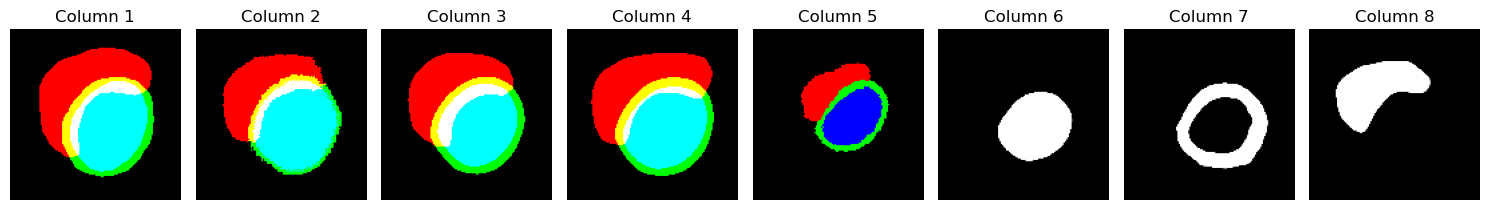

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


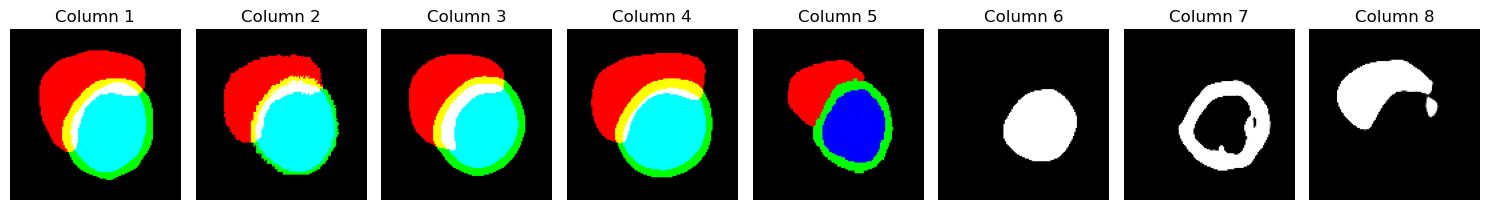

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


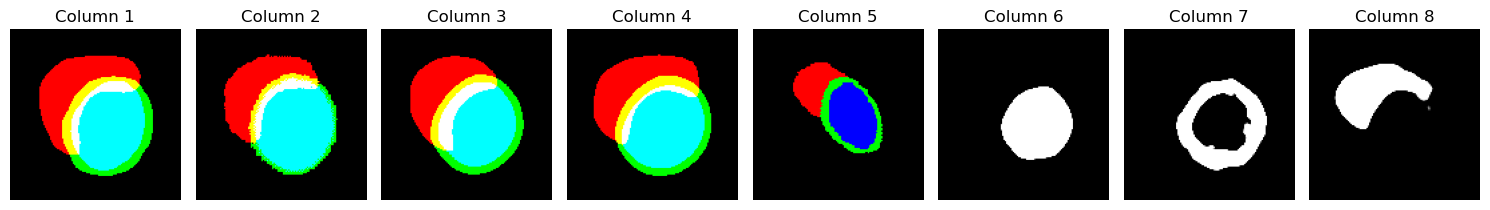

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


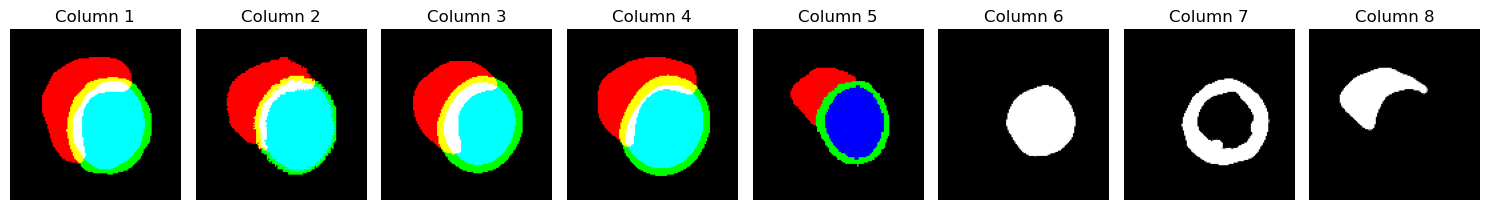

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


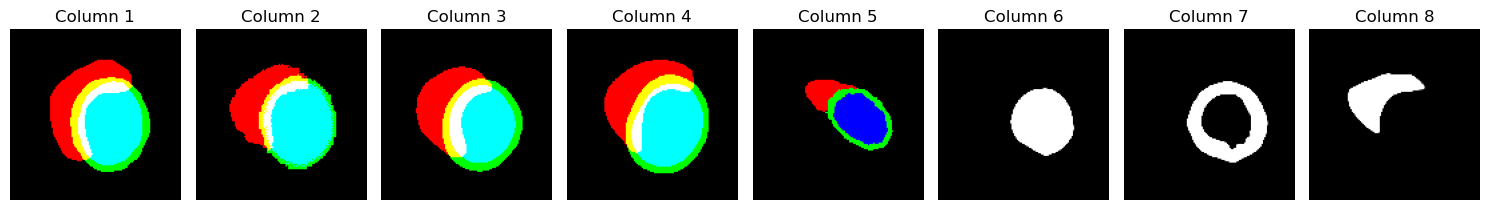

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


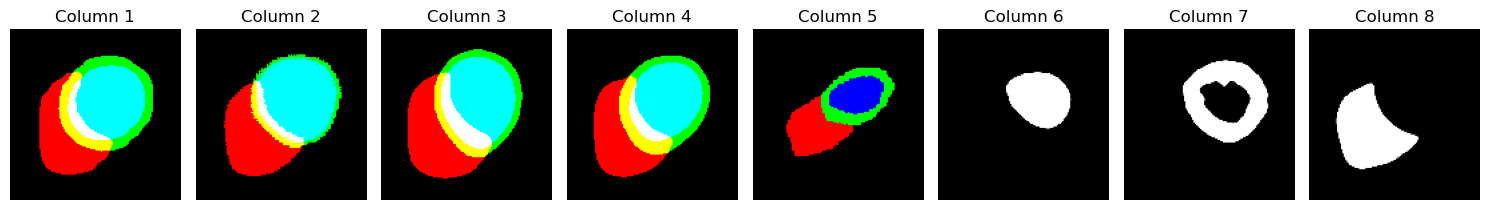

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


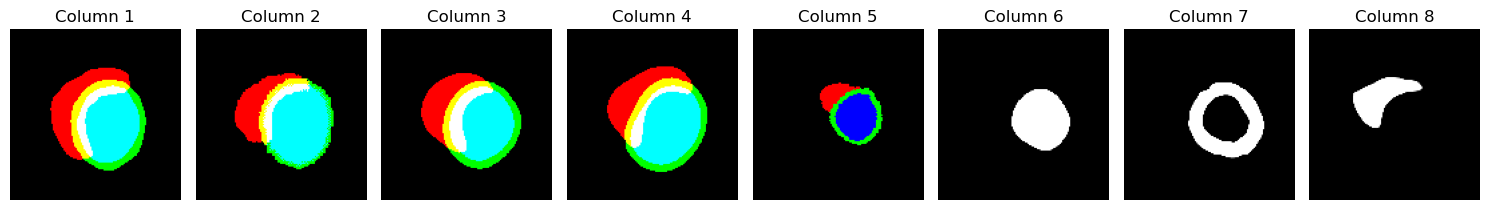

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


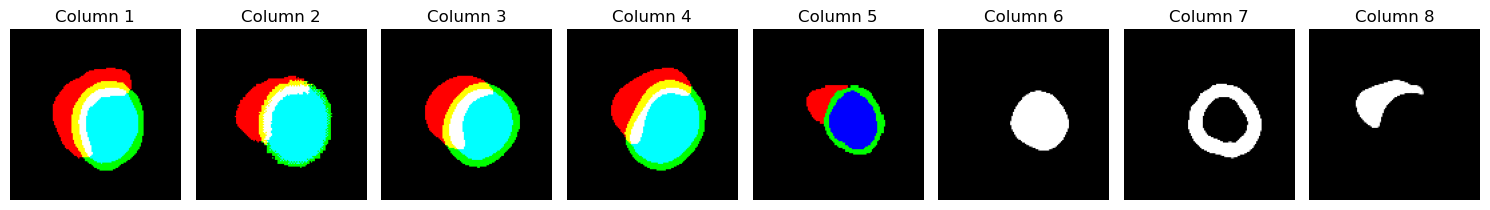

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


row_index = 655
for row_index in range(204,214):
    row = df.iloc[row_index]
    
    # Plot images in the row
    fig, axes = plt.subplots(1, len(row), figsize=(15, 5))  # One row of subplots
    
    for j, path in enumerate(row):
        img = mpimg.imread(path)  # Load image
        #output_masked = img * (img<0.2)  # Retain values > 0.8

        axes[j].imshow(img*255,cmap='grey')
        axes[j].axis("off")  # Hide axes
        axes[j].set_title(f"Column {j+1}")  # Optional: Add title for each subplot
    
    plt.tight_layout()
    plt.show()
